### Explanation
Here is the rutine perform colony strain diferentiation by color


In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#we use scikit-image to analyse the images
import skimage 
from skimage import io, filters

In [8]:
fname1 =  "D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_G_7_3_17\image_%04d.jpg"
print(fname1%(0))   # just to see
fname2 = "D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_O_10_3_17\image_%04d.jpg"

fname3 = "D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_R_13_3_17\image_%04d.jpg"

fname4 = "D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_RGO_17_3_17\image_%04d.jpg"

D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_G_7_3_17\image_0000.jpg


Lets see what frame 500 looks like. We use PyPlot to read the file into a numpy array. This is a 3-dimensional array (a grid of values) with dimensions x,y,c, with (x,y) position and c the color channel (red, green, blue). 

<img src="files/imagearray.png" width=256 height=256>

We can use PyPlot again to display the array, which interprets the array as a color image correctly.

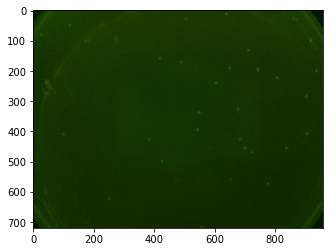

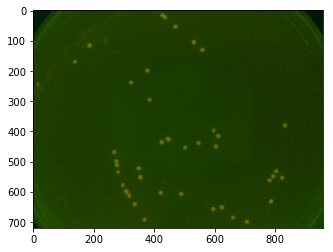

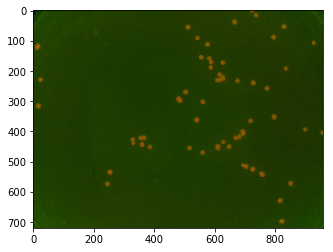

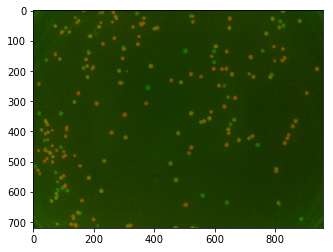

In [9]:
plt.figure()
im1 = plt.imread(fname1%100)
plt.imshow(im1)
plt.figure()
im2 = plt.imread(fname2%100)
plt.imshow(im2)
plt.figure()
im3 = plt.imread(fname3%100)
plt.imshow(im3)
plt.figure()
im4 = plt.imread(fname4%100)
plt.imshow(im4)

First get the size of the image from the numpy array shape, the 3rd dimension size is 3 for R,G,B. We dont need it so use the "_" variable.

In [10]:
w,h,_ = im1.shape
print(w,h)

720 960


### Loading the time series
There are 3 channels in each image. 
We will load each channel of all the images into a 3-dimensional array, with dimensions x, y, time. 

<img src="files/timeseriesarray.png" width=256 height=256>


As every image is a timepoint value, we should count the total number of images we have in the folder

In [11]:
import glob
def count_files(path,filetype):
    imageCount = len(glob.glob1(path,"*."+filetype))
    print(imageCount)
    return(imageCount)

In [12]:
#maybe this should be inside "get_im_data"
imCount1=count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_G_7_3_17',"jpg")
imCount2=count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_O_10_3_17',"jpg")
imCount3=count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_R_13_3_17',"jpg")
imCount4=count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_RGO_17_3_17',"jpg")

400
210
206
210


Set the function to read images and save his values on the 3-dimensional array (for each channel)

In [13]:
def get_im_data(xframes,imageCount,fname): 
#xframes = step frames (e.g. 10 to use only ten to ten images)
#imageCount = total number of files
    nt = int(imageCount/xframes)
    imsR = np.zeros((w,h,nt))
    imsG = np.zeros((w,h,nt))
    imsB = np.zeros((w,h,nt))
    for i in range(0,nt):
        im = plt.imread(fname%(i*xframes))
        imsR[:,:,i] = im[:,:,0]              #last number code the channel: 0=red, 1=green, 2=blue
        imsG[:,:,i] = im[:,:,1]
        imsB[:,:,i] = im[:,:,2]
    return(imsR,imsG,imsB)
#to call you can take only the channels you are interested in (e.g.):
# red,_,blue=get_im_data(xframes,imageCount)  ---> this only takes the red and blue channels

In [14]:
DataS1={}
DataS1['R'],DataS1['G'],DataS1['B']=get_im_data(10,imCount1,fname1) 

In [15]:
DataS2={}
DataS2['R'],DataS2['G'],DataS2['B']=get_im_data(5,imCount2,fname2) 

In [16]:
DataS3={}
DataS3['R'],DataS3['G'],DataS3['B']=get_im_data(5,imCount3,fname3) 

In [17]:
DataS4={}
DataS4['R'],DataS4['G'],DataS4['B']=get_im_data(5,imCount4,fname4) 

### Background subtraction

First step is to identify a good background area and compute his value over time:

In [18]:
def BG_Val(X1,X2,Y1,Y2,data):
    #X1,X2,Y1,Y2 --> rectangle area limits: (X1,Y1)--> left-up corner. (X2,Y2) ---> rigth-bottom corner
    #data = the desired channel data to get the background
    
    X2R=X2-X1 #convert on steps because the rectangle patch definition
    Y2R=Y2-Y1
    
    #plot the defined area
    plt.figure(figsize=(8,8))
    fig = plt.gcf()
    ax = fig.gca()
    ax.imshow(data[:,:,-1], cmap='gray')
    rect = matplotlib.patches.Rectangle((Y1,X1),Y2R,X2R,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
    #get the background time value and prot it
    plt.figure()
    bg = data[X1:X2,Y1:Y2,:].mean(axis=(0,1))
    plt.plot(bg)
    plt.xlabel('Time step')
    plt.ylabel('Fluorescence intensity')
    
    return(bg)

array([ 51.26915876,  53.62877925,  53.08208729,  53.1257432 ,
        52.88512334,  52.60642631,  52.49986085,  53.1200253 ,
        52.58805819,  52.96609741,  52.52392157,  52.3198988 ,
        51.73382669,  51.82393422,  51.42969007,  50.46445288,
        50.40441493,  50.15066414,  50.21535737,  49.88685642,
        50.14728653,  51.98660342,  51.41228336,  52.1427704 ,
        51.08966477,  51.03581278,  50.98672992,  50.58685642,
        50.59299178,  49.83253637,  49.65666034,  50.31641999,
        50.1398988 ,  50.64293485,  50.91636939,  51.90469323,
        52.25908918,  52.13623023,  52.12226439,  53.21469956])

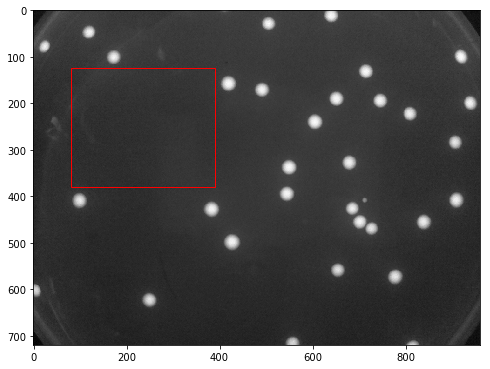

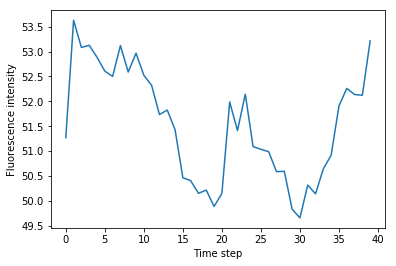

In [19]:
BG_Val(125,380,80,390,DataS1['G'])

## Get colony position

To identify colony position it's good to identify the channel with the biggest signal to improve the accuracy of the identification.

In [20]:
def max_chan(chan1,chan2,chan3):
    chans=np.zeros(3)
    chans[0]=chan1.sum()
    chans[1]=chan2.sum()
    chans[2]=chan3.sum()
    maxChan=chans.argmax()
    return(maxChan)

In [ ]:
max_chan(DataS1R,DataS1G,DataS1B)

In [21]:
def max_chan(Data):
    chans=np.zeros(3)
    chans[0]=Data['R'].sum()
    chans[1]=Data['G'].sum()
    chans[2]=Data['B'].sum()
    maxChan=chans.argmax()
    if maxChan == 0:
        return('R')
    elif maxChan == 1:
        return('G')
    elif maxChan == 2:
        return('B')

In [22]:
Mc1 = max_chan(DataS1) #Mc1 =maximum channel 1
Mc2 = max_chan(DataS2)
Mc3 = max_chan(DataS3)
Mc4 = max_chan(DataS4)
print('maximum channels are: '+ Mc1 +', '+Mc2 +', '+Mc3 +', '+Mc4 +', '+ 'respectively')

maximum channels are: G, G, G, G, respectively


This strategy doesn't work.... (try different channels in the plot below and you will see --> it always retrives the green channel because background if biggest on them).
It's better to set it by eye

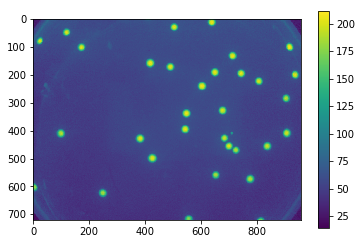

In [23]:
plt.imshow(DataS1['G'][:,:,-1])
plt.colorbar()

Based on above plot, we can fix the max value channels:
(and, as we expect, it is never the blue channel)

In [16]:
Mc1='G'
Mc2='R'
Mc3='R'
Mc4='R'

## General color analysis
As a first aproach it's possible to analyse the relative level of green and red channel on the whole image over time

In [17]:
def Sum_2C_plot(data,Channel1,Channel2,Fname):
    plt.figure()
    plt.plot(data[Channel1].sum(axis=(0,1)),data[Channel2].sum(axis=(0,1)))
    plt.title(Fname)
    plt.xlabel(Channel1+' Channel')
    plt.ylabel(Channel2+' Channel')

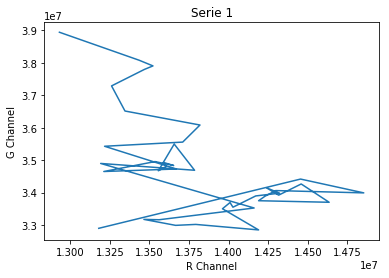

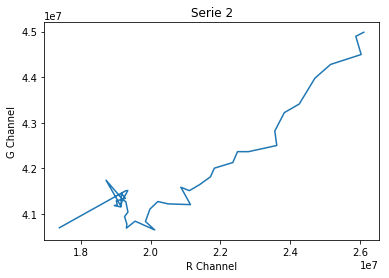

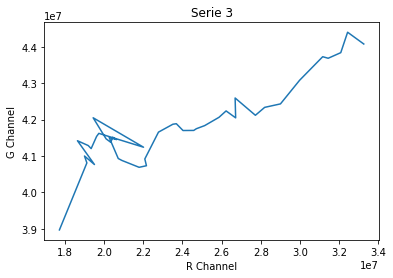

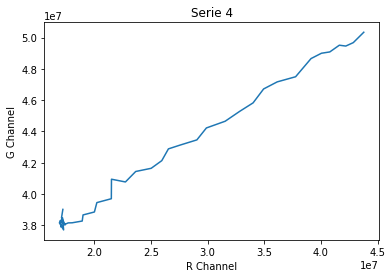

In [18]:
Chan1='R'
Chan2='G'
Sum_2C_plot(DataS1,Chan1,Chan2,'Serie 1')
Sum_2C_plot(DataS2,Chan1,Chan2,'Serie 2')
Sum_2C_plot(DataS3,Chan1,Chan2,'Serie 3')
Sum_2C_plot(DataS4,Chan1,Chan2,'Serie 4')

## Colony color analysis 
To improve analysis is good to identify the specific región of the colonies and perform the colony analysis only over that region and get rid of the reast of noise

it's good to identify the channel with the biggest signal to improve the accuracy of the identification.

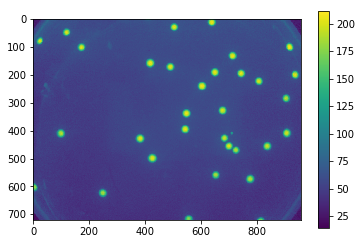

In [19]:
plt.imshow(DataS1['G'][:,:,-1])
plt.colorbar()

Based on above plot, we can fix the max value channels:
(and, as we expect, it is never the blue channel)

In [20]:
Mc1='G'
Mc2='R'
Mc3='R'
Mc4='R'
channels=['R','G','B']

First step is to identify the colonies: 
To afford that and reduce noise is recommended to apply a filter to smooth the data:

In [21]:
from skimage.filters import gaussian

In [22]:
def smoothDat(data,sigma):
    
    nsims={}
    
    for char in channels:
        data_sum = data[char].sum(axis=2)
        sims= gaussian(data_sum, sigma)
        nsims [char]= (sims-sims.min())/(sims.max()-sims.min())
        
    plt.figure(figsize=(15,3))
    plt.subplot(131)
    plt.imshow(nsims[channels[0]])
    plt.colorbar()
    plt.title(channels[0])

    plt.subplot(132)
    plt.imshow(nsims[channels[1]])
    plt.colorbar()
    plt.title(channels[1])
    
    plt.subplot(133)
    plt.imshow(nsims[channels[2]])
    plt.colorbar()
    plt.title(channels[2])
    
    return(nsims)



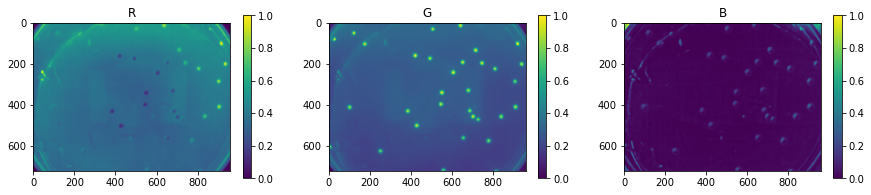

In [23]:
sDatS1=smoothDat(DataS1,2)

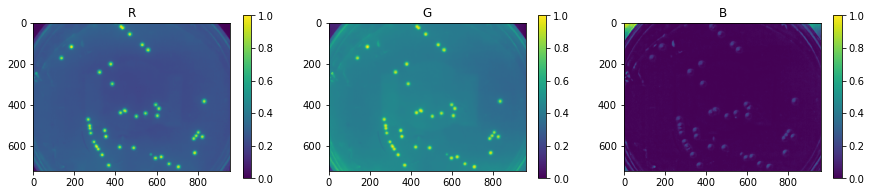

In [24]:
sDatS2=smoothDat(DataS2,2)

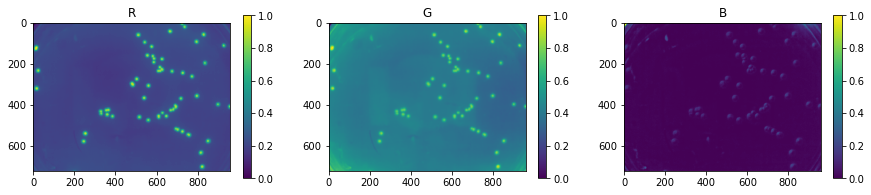

In [25]:
sDatS3=smoothDat(DataS3,2)

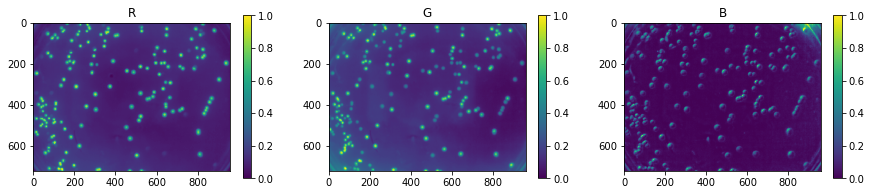

In [26]:
sDatS4=smoothDat(DataS4,2)

#### Blob detection
Scikit-image provides several functions to detect Gaussian-like features ([blobs](http://scikit-image.org/docs/dev/auto_examples/plot_blob.html)). We apply one of these ([blob_log](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.blob_log)) to the smoothed sum of intensity, and it returns a list of position (x,y) and width (standard deviation):

In [27]:
import skimage.feature as skfeat

In [28]:
def colonyBlob(data,thresh):
    A = skfeat.blob_log(data, min_sigma=1.0, max_sigma=10.0, num_sigma=100, threshold=thresh, overlap=0.8)
    
    plt.figure(figsize=(8,8))
    plt.imshow(data, cmap='gray')
    plt.hold(True)
    for i in range(len(A)):
        circle = plt.Circle((A[i,1], A[i,0]), 2*A[i,2], color='r', fill=False , lw=0.5)
        fig = plt.gcf()
        ax = fig.gca()
        ax.add_artist(circle)
    
    return(A)

To properly identification, it's important to set the threshold for each dataset manually (based on the previous colormap)

C:\Users\Prosimio\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


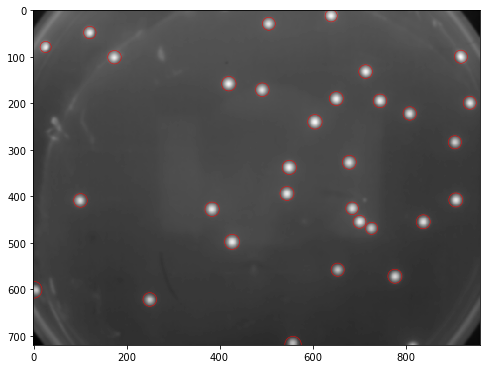

In [29]:
blobD1 = colonyBlob(sDatS1[Mc1],0.25)

C:\Users\Prosimio\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


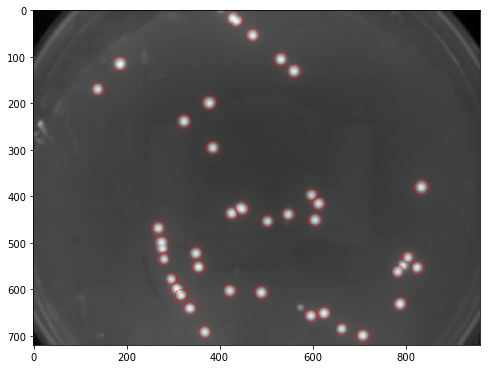

In [30]:
blobD2 = colonyBlob(sDatS2[Mc2],0.25)

C:\Users\Prosimio\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


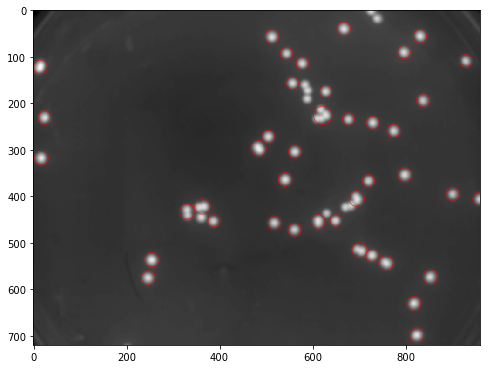

In [31]:
blobD3 = colonyBlob(sDatS3[Mc3],0.28)

C:\Users\Prosimio\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


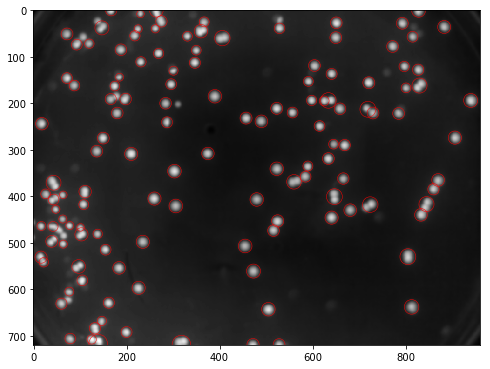

In [32]:
blobD4 = colonyBlob(sDatS4[Mc4],0.25)

To focus image analysis to each colony, we can extract a region at each location (ROI), with size given by the Gaussian width (x2 = 2 standard deviations).

In [196]:
def obtain_rois(data,blobs):
#data is the channel with the 

    all_rois = {}
    all_rois_circle = {}
    
    for char in channels:
        rois = {}
        rois_circle = {}
        
        for i in range(len(blobs)):
            x = blobs[i,0]
            y = blobs[i,1]
            r = 2*blobs[i,2] #blobs[i,2] is the std deviation of the radious --> r=2*std implies 95% confidence

####### this lines is to eliminate the out of image bounds error          
            x1=x-r
            x2=x+r
            y1=y-r
            y2=y+r
            
            if x1 <= 0:
                x1 = 0
            if x2 >= data[char].shape[0]:
                x2 = data[char].shape[0]
            if y1 <= 0:
                y1 = 0
            if y2 >= data[char].shape[1]:
                y2 = data[char].shape[1]
            
            rois[i] = data[char][x1:x2,y1:y2,:]    
#######            
            xr=int((rois[i].shape[0]+1)/2)
            yr=int((rois[i].shape[1]+1)/2)
            rois_circle[i]=np.zeros((rois[i].shape))
            for n in range(rois[i].shape[0]):
                for m in range(rois[i].shape[1]):
                    if ((n-xr)**2+(m-yr)**2) <= (r**2):
                        rois_circle[i][n,m,:] = rois[i][n,m,:]
        all_rois[char] = rois
        all_rois_circle[char] = rois_circle
    
    return(all_rois,all_rois_circle)

In [197]:
DataS1['R'].shape[0]

720

In [198]:
rois1,rois1C = obtain_rois(DataS1,blobD1)
rois2,rois2C = obtain_rois(DataS2,blobD2)
rois3,rois3C = obtain_rois(DataS3,blobD3)
rois4,rois4C = obtain_rois(DataS4,blobD4)
# rois contains a square arund the colony
# roisC makes the values outside the colony equals to zero

# to call it:
# roisC['channel_name'][blob_number][y,x,timepoint]

C:\Users\Prosimio\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [199]:
print(blobD1)

[[  12.          640.            6.54545455]
 [  29.          506.            7.        ]
 [  48.          121.            6.72727273]
 [  79.           26.            6.        ]
 [ 100.          919.            7.09090909]
 [ 101.          174.            7.27272727]
 [ 132.          714.            7.36363636]
 [ 158.          420.            7.81818182]
 [ 171.          492.            7.36363636]
 [ 190.          651.            7.54545455]
 [ 195.          745.            7.36363636]
 [ 199.          938.            7.09090909]
 [ 222.          809.            7.27272727]
 [ 240.          605.            7.81818182]
 [ 284.          906.            7.09090909]
 [ 327.          679.            7.54545455]
 [ 338.          550.            7.72727273]
 [ 394.          545.            7.54545455]
 [ 408.          908.            7.54545455]
 [ 409.          101.            7.36363636]
 [ 426.          685.            6.81818182]
 [ 428.          384.            7.72727273]
 [ 455.   

In [200]:
print(rois1['R'][0].shape)
print(rois1['R'][1].shape)
print(rois1C['R'][0].shape)
print(blobD1.shape)
print(len(rois1['R']))
print(len(rois1C['R']))

(25, 27, 40)
(28, 28, 40)
(25, 27, 40)
(31, 3)
31
31


In [201]:
print(rois1['R'][1][:,1,1])
print(rois1C['R'][1][:,1,1]) #it contains only the pixels inside the circular region

[ 29.  30.  30.  30.  31.  28.  27.  29.  29.  26.  26.  29.  29.  27.  27.
  27.  26.  29.  31.  31.  28.  25.  29.  28.  26.  26.  26.  26.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.  26.  26.  29.  29.  27.  27.
  27.  26.  29.  31.  31.   0.   0.   0.   0.   0.   0.   0.   0.]


*lo que viene ahora es graficar.
*acabo de notar que tomé el área circular comun para todos los tiempos (en el futuro debo corregir eso pues es mejor que usar los valores de todo el ROIS, pero lo mejor es que el área circular sea dinámica para todos los tiempo)
 ---> solo el último slice de tiempo tiene los valores perfectos.

In [202]:
print(len(rois1C['R'][1]))
print(len(rois1C['R']))
print(rois1C['R'][0].shape)
print(rois1C['G'][3][:,:,-1].sum(axis=(0,1))) #this sum all the values of the image over the last timepoint
print(blobD1[0,2])
print(rois1C['R'][0])
print(rois1['R'][0])

28
31
(25, 27, 40)
65823.0
6.54545454545
[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0

In [232]:
def rois_last_plot(data,Channel1,Channel2,Fname):
    #plt.figure(figsize=(8,8))
    chanx=np.zeros((len(data[Channel1]),1))
    chany=np.zeros((len(data[Channel1]),1))
    for i in range(len(data[Channel1])):
        chanx[i]=data[Channel1][i][:,:,-1].sum(axis=(0,1))
        chany[i]=data[Channel2][i][:,:,-1].sum(axis=(0,1))
    plt.plot(chanx,chany,'bo')
    plt.title(Fname)
    plt.xlabel(Channel1+' Channel')
    plt.ylabel(Channel2+' Channel')
    return(chanx,chany)

In [219]:
for i in range(len(rois1C['R'])):
    print(rois1C['R'][i][:,:,-1].sum(axis=(0,1)))

24923.0
20432.0
14230.0
10501.0
33711.0
15923.0
21110.0
3202.0
2956.0
6891.0
20134.0
31465.0
27568.0
2509.0
30573.0
4046.0
1168.0
1382.0
33755.0
11057.0
3383.0
1031.0
4180.0
25579.0
6806.0
1475.0
5161.0
15409.0
10499.0
7562.0
12548.0


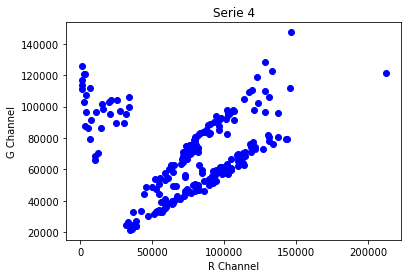

In [233]:
Chan1='R'
Chan2='G'
Xchan1,Ychan1=rois_last_plot(rois1C,Chan1,Chan2,'Serie 1')
Xchan2,Ychan2=rois_last_plot(rois2C,Chan1,Chan2,'Serie 2')
Xchan3,Ychan3=rois_last_plot(rois3C,Chan1,Chan2,'Serie 3')
Xchan4,Ychan4=rois_last_plot(rois4C,Chan1,Chan2,'Serie 4')

In [275]:
?np.linalg.lstsq

In [268]:
#perform linear fit
def linear_fit(data1,data2):
    z=np.polyfit(data1, data2, 1)
    print(z)           #first component is the slope
    p = np.poly1d(z)
    print(np.poly1d(p))
    xp = np.linspace(data1.min(), data1.max(), 2)
    #plt.plot(timeC[init:end], ratio[init:end,i], '.', xp, p(xp), '-')
    plt.plot(data1, data2, '.', xp, p(xp), '-')
    plt.show()
    return(z)

In [253]:
Xchan1[0:3,0]

array([ 24923.,  20432.,  14230.])

In [7]:
?np.polyfit()

[ 1.  2.]
 
1 x + 2


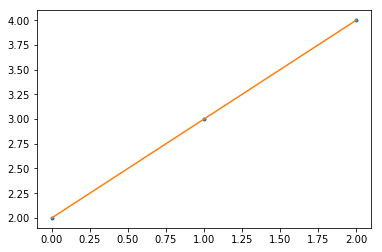

[ -2.86096840e-01   1.01982908e+05]
 
-0.2861 x + 1.02e+05


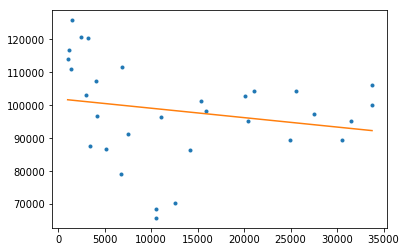

[   0.99721819 -990.67464781]
 
0.9972 x - 990.7


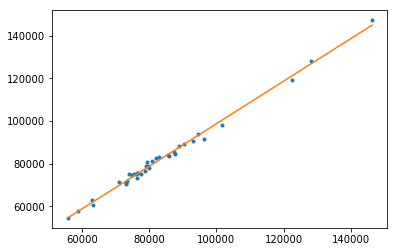

[  5.36252522e-01   6.52798777e+03]
 
0.5363 x + 6528


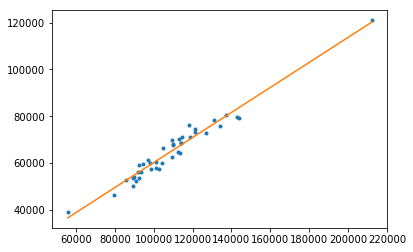

In [269]:
fit0=linear_fit(np.array([0,1,2]),np.array([2,3,4]))
fit1=linear_fit(Xchan1[:,0],Ychan1[:,0])
fit2=linear_fit(Xchan2[:,0],Ychan2[:,0])
fit3=linear_fit(Xchan3[:,0],Ychan3[:,0])

In [ ]:
#Clasificator
def colony_clasificator(points,):
    p = np.poly1d(z)



In [229]:
def rois_2C_plot(data,Channel1,Channel2,Fname):
# this function plots the sum of the pixel specific channel values inside all rois  for each time, agais other channel
# (each point is a time point)
    plt.figure(figsize=(8,8))    
    for i in range(len(data[Channel1])):
        plt.plot(data[Channel1][i].sum(axis=(0,1)),data[Channel2][i].sum(axis=(0,1)))
        plt.hold(True)
    plt.title(Fname)
    plt.xlabel(Channel1+' Channel')
    plt.ylabel(Channel2+' Channel')
    plt.axis([0, 200000, 20000, 150000])

In [223]:
?plt.plot

In [ ]:
rois1C.shape

In [ ]:
print('lala')

C:\Users\Prosimio\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


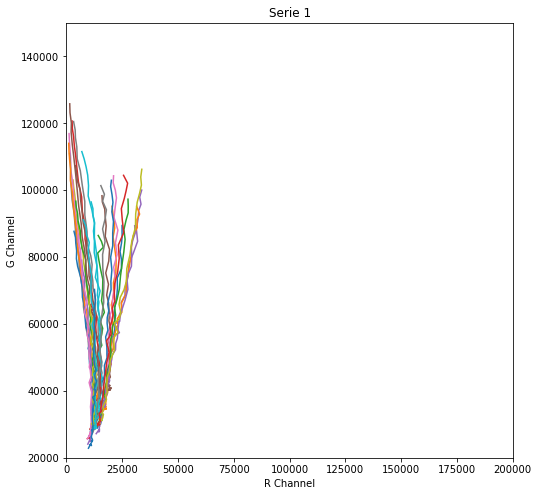

In [230]:
Chan1='R' # x axis channel
Chan2='G' # y axis channel
rois_2C_plot(rois1C,Chan1,Chan2,'Serie 1')

C:\Users\Prosimio\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Prosimio\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


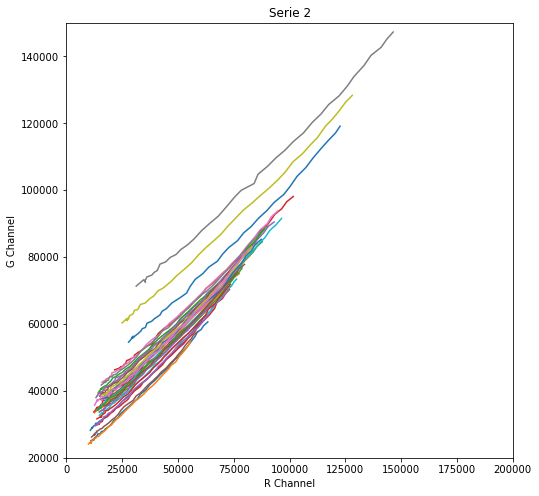

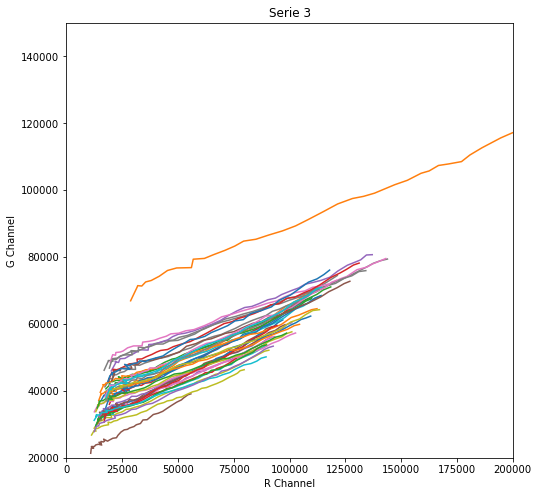

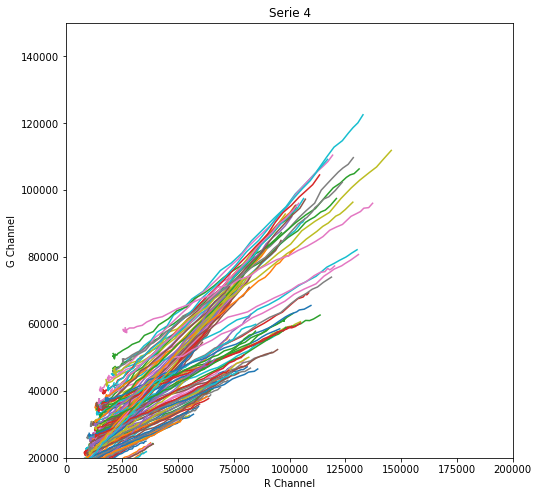

In [231]:
rois_2C_plot(rois2C,Chan1,Chan2,'Serie 2')
rois_2C_plot(rois3C,Chan1,Chan2,'Serie 3')
rois_2C_plot(rois4C,Chan1,Chan2,'Serie 4')

In [156]:
whos

NameError: name 'whos' is not defined

In [160]:
%who str

Chan1	 Chan2	 Mc1	 Mc2	 Mc3	 Mc4	 fname1	 fname2	 fname3	 
fname4	 


In [161]:
?who

In [158]:
whos

Variable      Type        Data/Info
-----------------------------------
BG_Val        function    <function BG_Val at 0x000000001D35B378>
Chan1         str         R
Chan2         str         G
DataS1        dict        n=3
DataS1B       ndarray     720x960x38: 26265600 elems, type `float64`, 210124800 bytes (200.390625 Mb)
DataS1G       ndarray     720x960x38: 26265600 elems, type `float64`, 210124800 bytes (200.390625 Mb)
DataS1R       ndarray     720x960x38: 26265600 elems, type `float64`, 210124800 bytes (200.390625 Mb)
DataS2        dict        n=3
DataS2B       ndarray     720x960x42: 29030400 elems, type `float64`, 232243200 bytes (221.484375 Mb)
DataS2G       ndarray     720x960x42: 29030400 elems, type `float64`, 232243200 bytes (221.484375 Mb)
DataS2R       ndarray     720x960x42: 29030400 elems, type `float64`, 232243200 bytes (221.484375 Mb)
DataS3        dict        n=3
DataS3B       ndarray     720x960x41: 28339200 elems, type `float64`, 226713600 bytes (216.2109375 Mb)
D

In [166]:
who

BG_Val	 Chan1	 Chan2	 DataS1	 DataS1B	 DataS1G	 DataS1R	 DataS2	 DataS2B	 
DataS2G	 DataS2R	 DataS3	 DataS3B	 DataS3G	 DataS3R	 DataS4	 DataS4B	 DataS4G	 
DataS4R	 Mc1	 Mc2	 Mc3	 Mc4	 Sum_2C_plot	 Sum_plot	 count_files	 filters	 
fname1	 fname2	 fname3	 fname4	 get_im_data	 glob	 h	 im1	 im2	 
im3	 im4	 imCount1	 imCount2	 imCount3	 imCount4	 io	 matplotlib	 max_chan	 
np	 plt	 skimage	 w	 
